In [1]:
!nvidia-smi

Wed Dec 11 16:10:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display,Image

In [5]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Projects_datasets/garbage_detection

/content/drive/MyDrive/Projects_datasets/garbage_detection


In [7]:
ls

data.yaml  test/  train/  valid/


In [8]:
%cd /content/drive/MyDrive/Projects_datasets/garbage_detection
!yolo task=detect mode=train model=yolo11s.pt data=data.yaml epochs=300 imgsz=640 plots=True

/content/drive/MyDrive/Projects_datasets/garbage_detection
100% 18.4M/18.4M [00:00<00:00, 230MB/s]
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

In [9]:
!ls /content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/train/

args.yaml					    P_curve.png       train_batch290.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch291.jpg
confusion_matrix.png				    R_curve.png       train_batch292.jpg
events.out.tfevents.1733933759.6f0c0da51ecb.2122.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


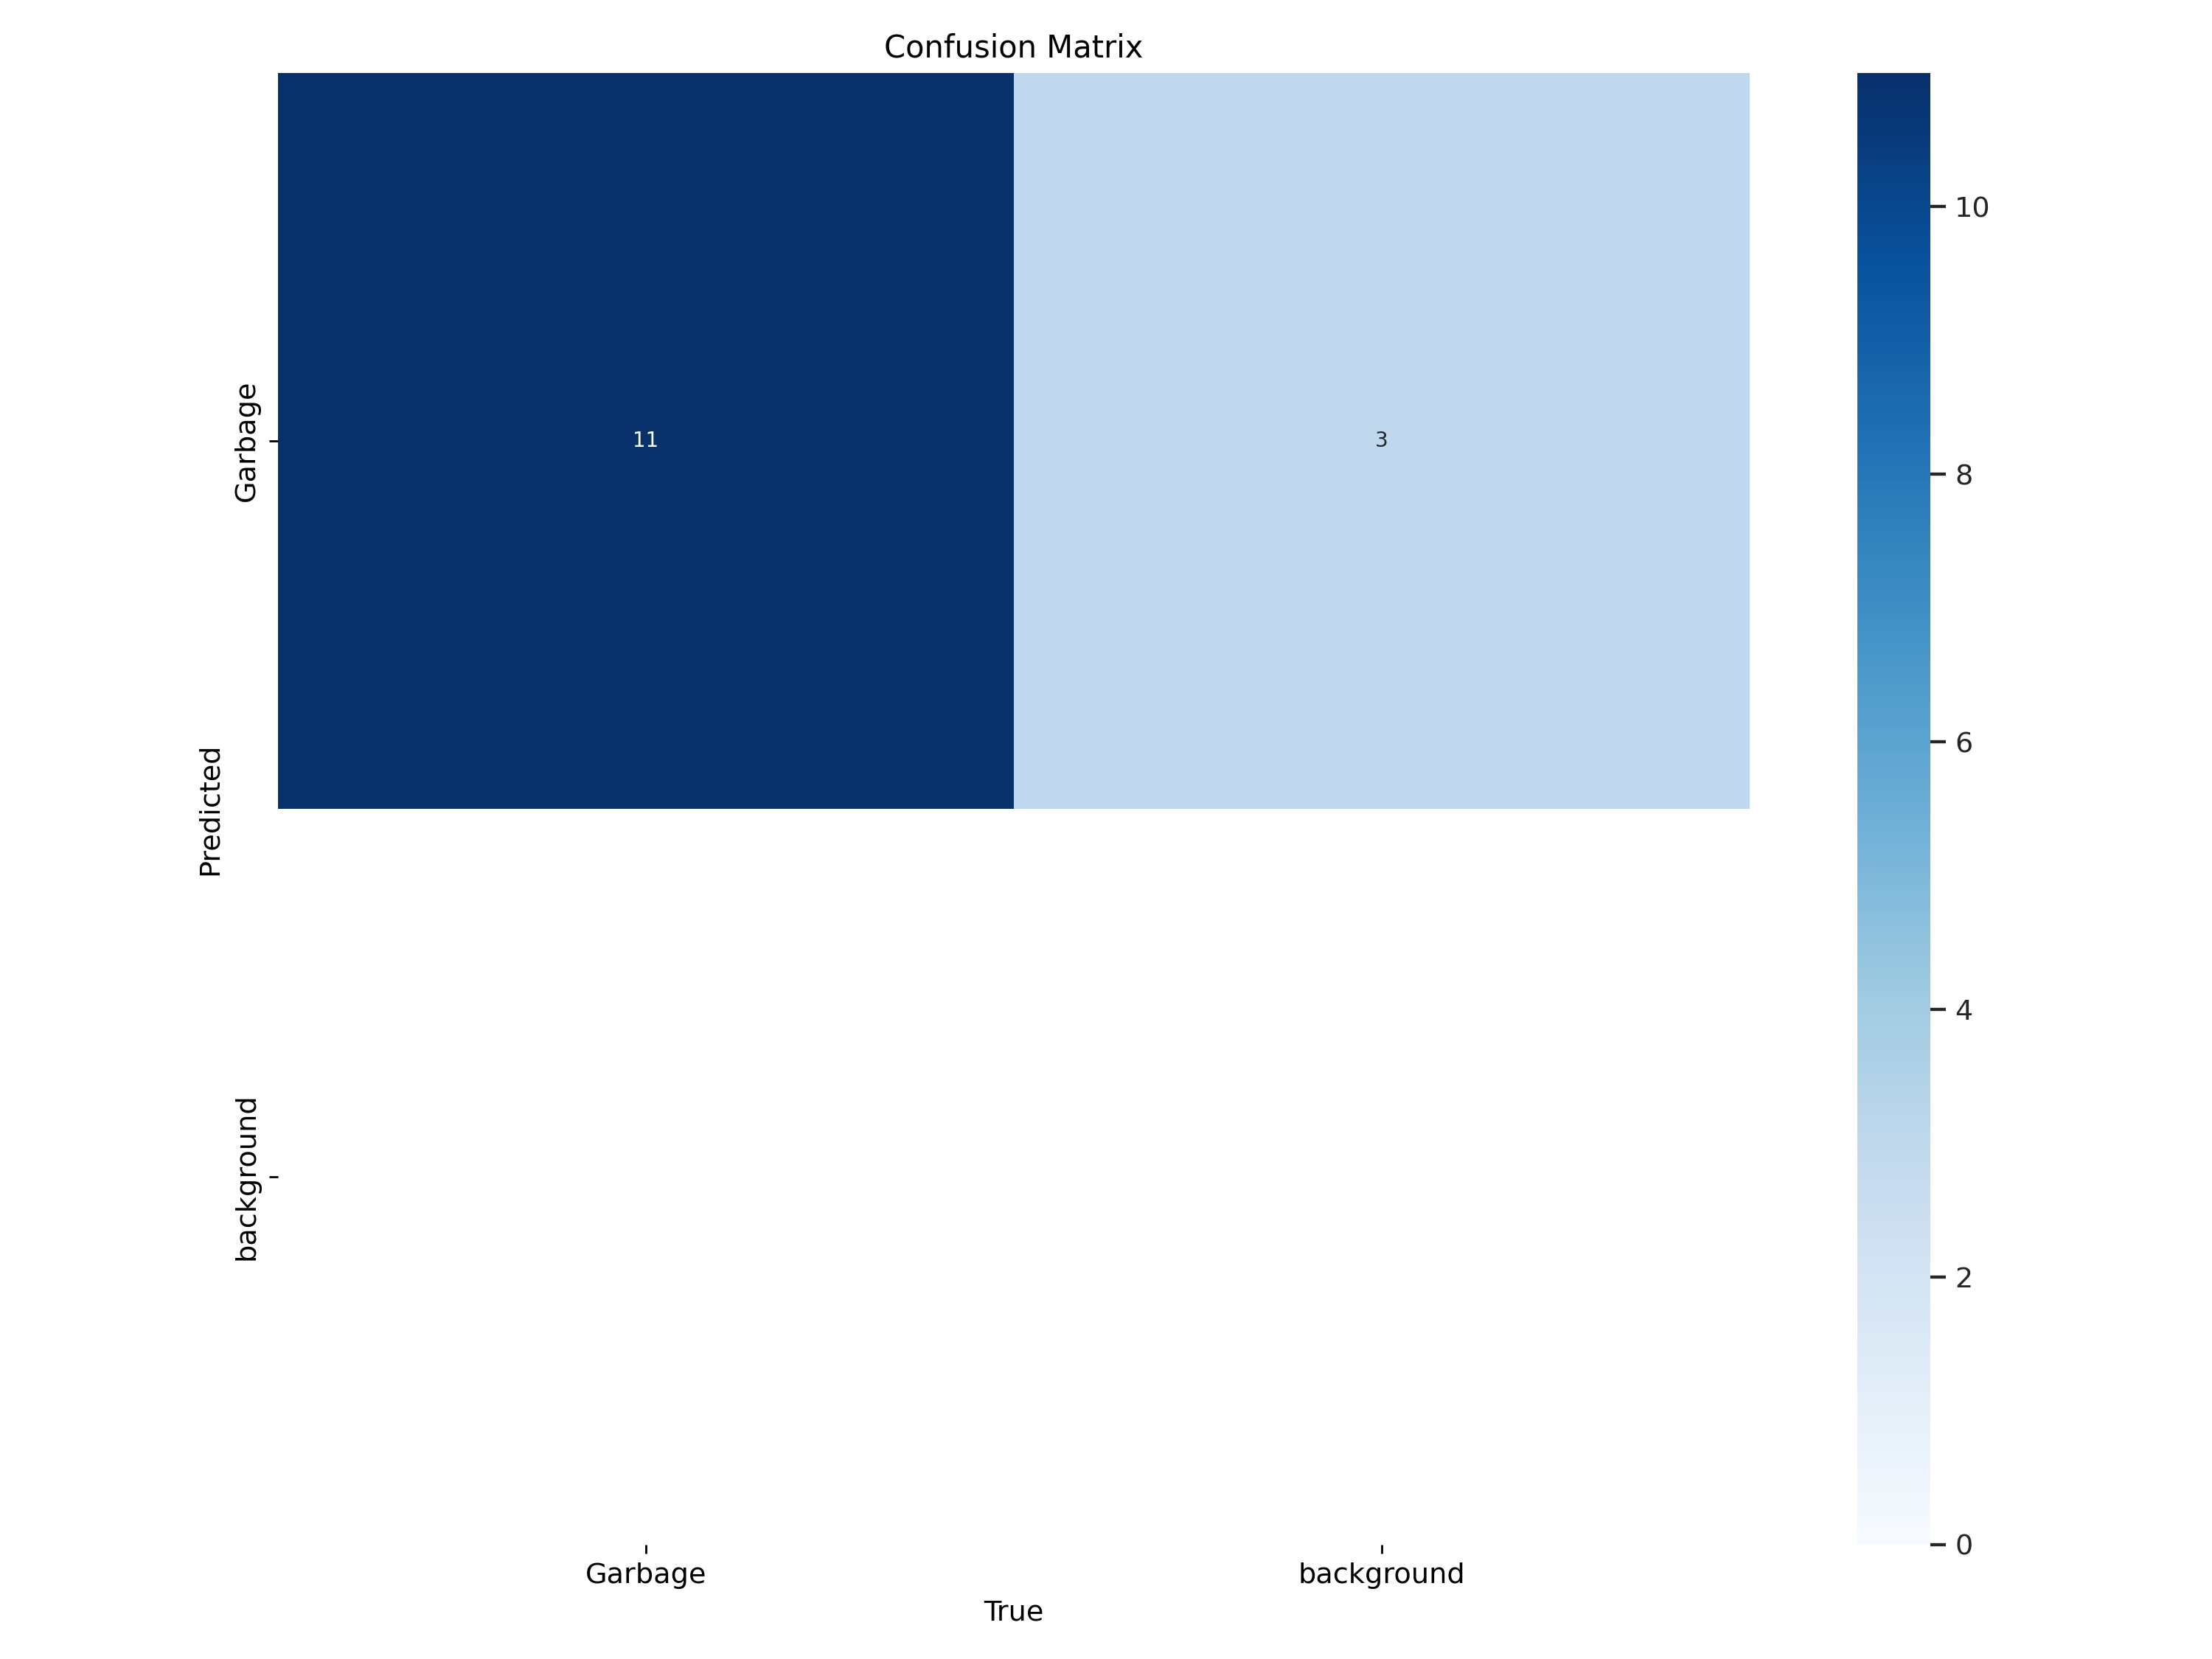

In [10]:
Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/train/confusion_matrix.png",width=600)

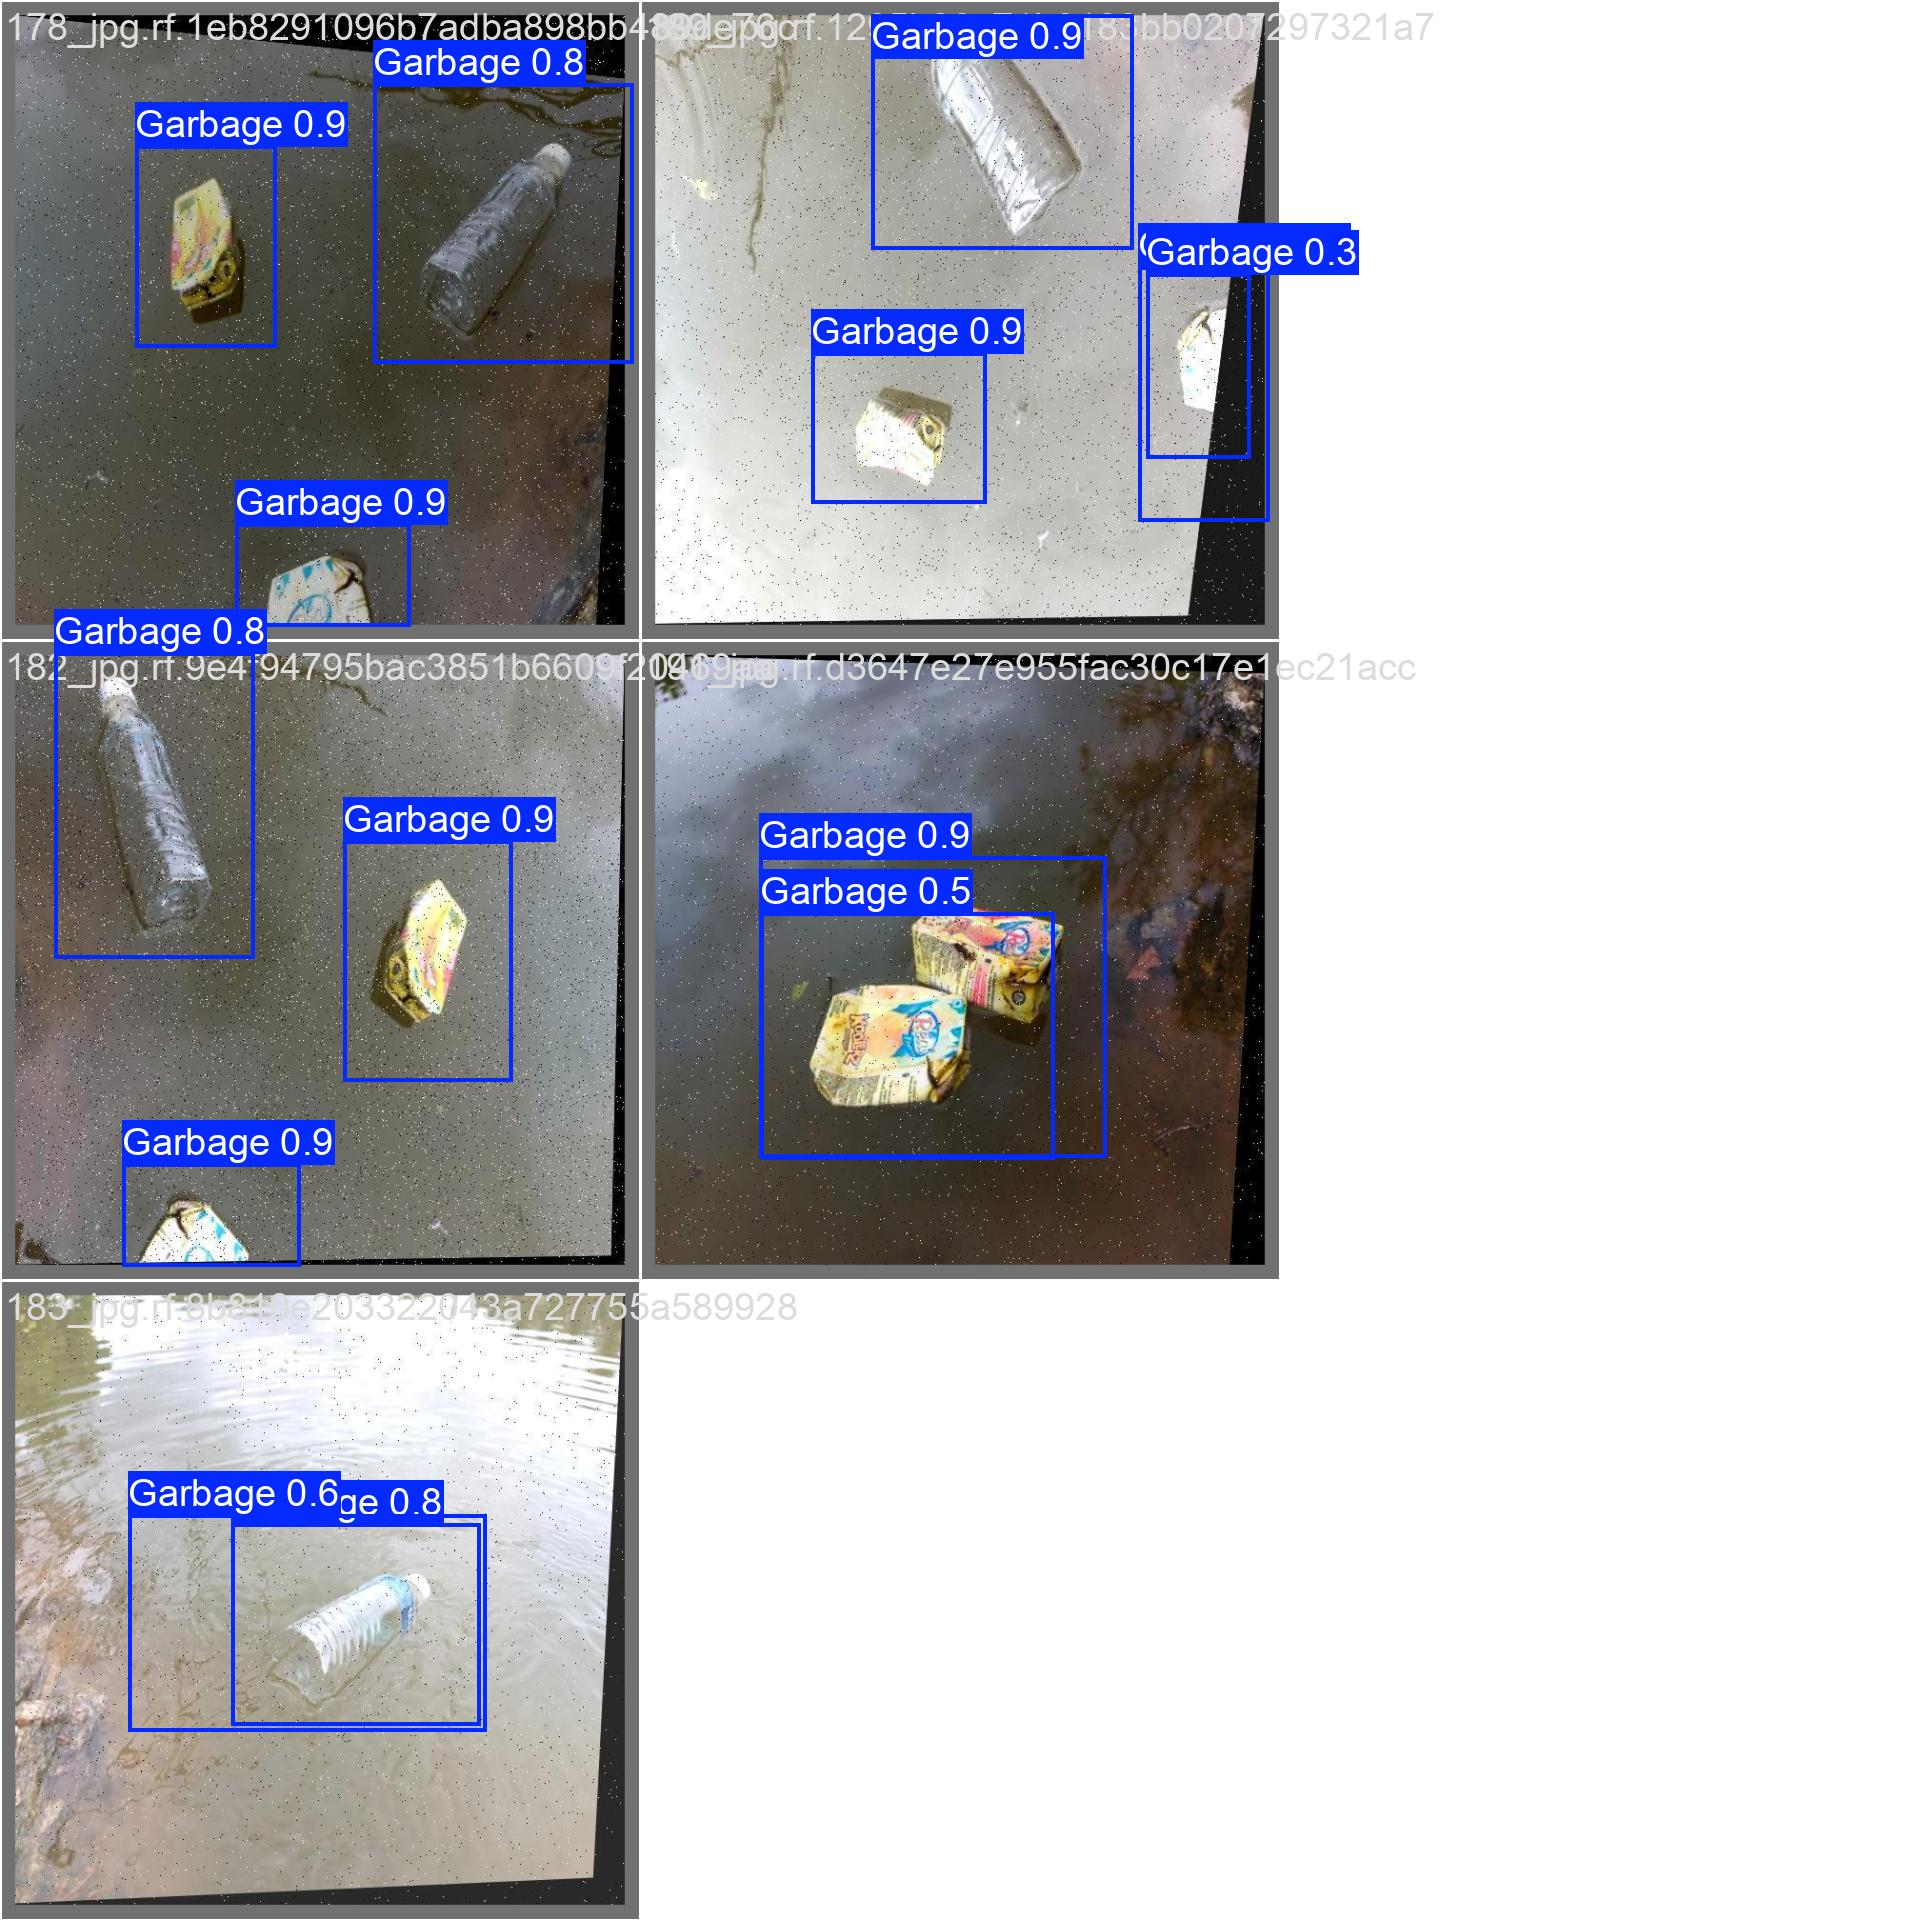

In [11]:
Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/train/val_batch0_pred.jpg",width=600)

In [12]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/Projects_datasets/garbage_detection/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.23it/s]
                   all          5         11      0.978      0.909      0.976      0.478
Speed: 0.3ms preprocess, 29.9ms inference, 0.0ms loss, 107.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Projects_datasets/garbage_detection/test/images

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/4 /content/drive/MyDrive/Projects_datasets/garbage_detection/test/images/0_jpg.rf.872216527fcc9bcd7a5983bc8072f26a.jpg: 640x640 1 Garbage, 15.7ms
image 2/4 /content/drive/MyDrive/Projects_datasets/garbage_detection/test/images/0_jpg.rf.f6701be62ef9e6dcf247a2857d1fd9be.jpg: 640x640 1 Garbage, 15.6ms
image 3/4 /content/drive/MyDrive/Projects_datasets/garbage_detection/test/images/178_jpg.rf.f58fdb593b4ec87810e88fac93186747.jpg: 640x640 4 Garbages, 15.6ms
image 4/4 /content/drive/MyDrive/Projects_datasets/garbage_detection/test/images/179_jpg.rf.9c9426dc74038bd63ca5e187e1ed9b1e.jpg: 640x640 4 Garbages, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 140.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


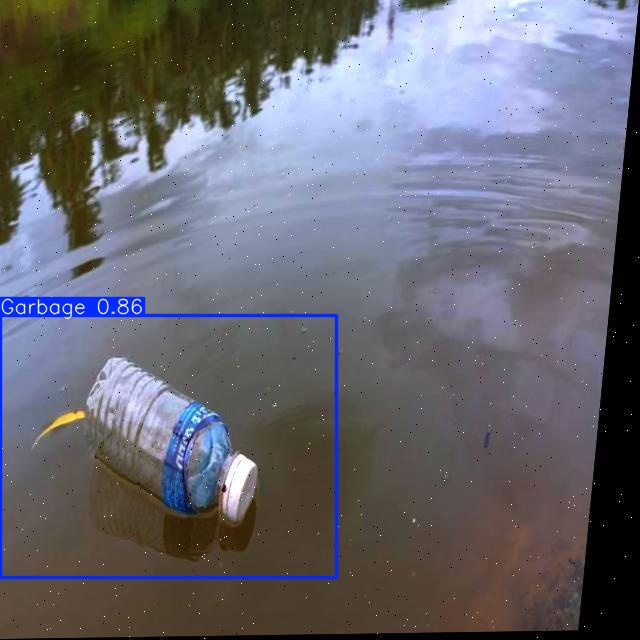

In [14]:
pred_1 = Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/predict/0_jpg.rf.872216527fcc9bcd7a5983bc8072f26a.jpg",width=600)
pred_1

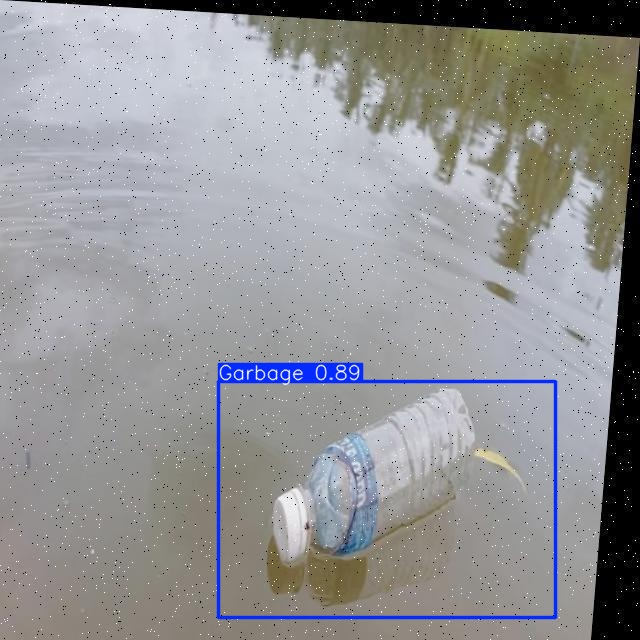

In [15]:
pred_2 = Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/predict/0_jpg.rf.f6701be62ef9e6dcf247a2857d1fd9be.jpg",width=600)
pred_2

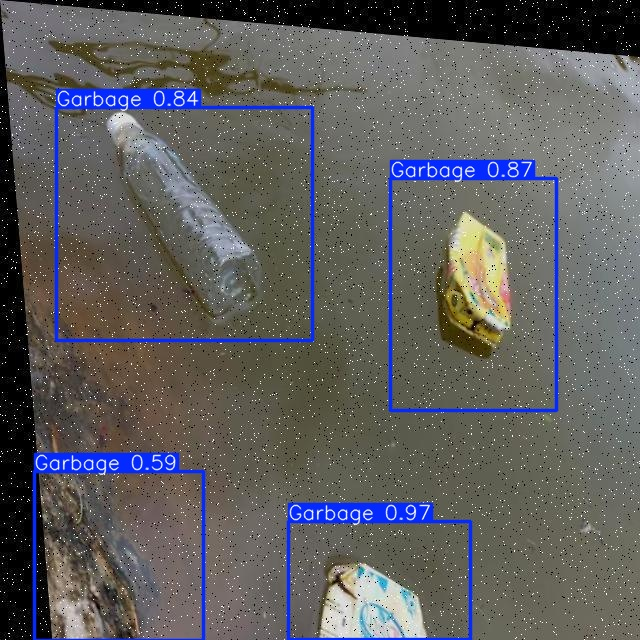

In [16]:
pred_3 = Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/predict/178_jpg.rf.f58fdb593b4ec87810e88fac93186747.jpg",width=600)
pred_3

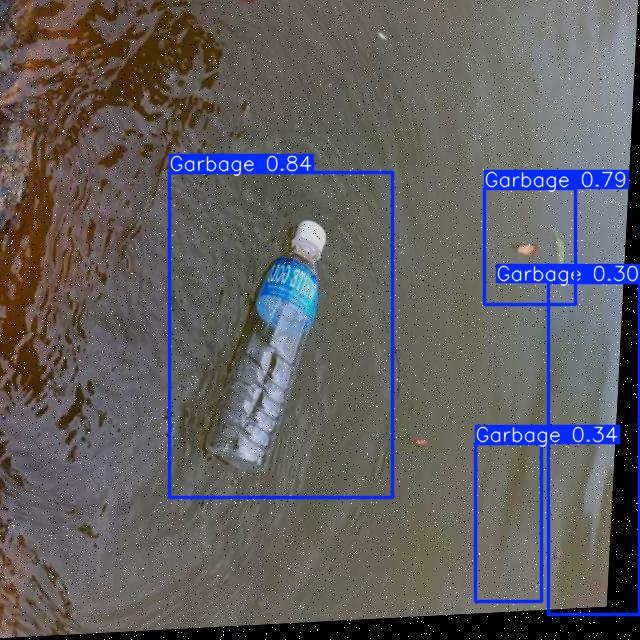

In [17]:
pred_4 = Image(filename="/content/drive/MyDrive/Projects_datasets/garbage_detection/runs/detect/predict/179_jpg.rf.9c9426dc74038bd63ca5e187e1ed9b1e.jpg",width=600)
pred_4